In [1]:
import os

In [4]:
cwd = os.chdir(r'C:\MachineLearning')
os.getcwd()

'C:\\MachineLearning'

In [5]:
dataset= '311_Service_Requests_from_2010_to_Present.csv'

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
plt.style.use('ggplot')

In [7]:
pd.set_option('max_columns',5000)

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv(dataset)

In [10]:
data['Closed Date'] = data['Closed Date'].astype('datetime64',)
data['Created Date']= data['Created Date'].astype('datetime64')
data['Due Date'] = pd.to_datetime(data['Due Date'], unit='ns')
data['Resolution Action Updated Date'] = pd.to_datetime(data['Resolution Action Updated Date'], unit='ns')

In [11]:
data.to_csv('modified_311_Service_Requests.csv',index=False)

In [12]:
data = pd.read_csv('modified_311_Service_Requests.csv', parse_dates=['Created Date','Closed Date','Due Date',\
                                                                    'Resolution Action Updated Date'])

In [13]:
print('The dataset has {:,d} rows and {} columns'.format(data.shape[0],data.shape[1]))

The dataset has 300,698 rows and 53 columns


In [14]:
data.isnull().any().sum()

35

In [15]:
cols_to_drop = ['School Name','School Number','School Region','School Code','School Phone Number',\
                'School Address','School City','School State','School Zip','School or Citywide Complaint',\
                'Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name',\
                'Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name',\
                'Ferry Direction','Ferry Terminal Name']

In [16]:
data.drop(axis=1,labels=cols_to_drop,inplace=True)

In [17]:
data.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,2016-01-01 07:59:00,The Police Department responded and upon arriv...,2016-01-01 00:55:00,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,2016-01-01 07:59:00,The Police Department responded to the complai...,2016-01-01 01:26:00,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [18]:
data['Created Date'].isnull().sum()

0

In [19]:
data['Closed Date'].isnull().sum()

2164

In [20]:
data.dropna(subset=['Closed Date'], inplace=True)

In [21]:
print('The dataset when the null values have been removed has {:,d} rows and {} columns'.format(data.shape[0],data.shape[1]))

The dataset when the null values have been removed has 298,534 rows and 33 columns


In [22]:
data['Request Closing Time'] = (data['Closed Date'].dt.date - data['Created Date'].dt.date).astype('str')

In [23]:
import re
pattern = re.compile(r'\w+') #to match digits

In [24]:
data['Request Closing Time']= data['Request Closing Time'].apply(lambda x: re.match(pattern,x).group(0)).astype(int)

In [25]:
request_closing_time_by_complaint_type =\
data.groupby(['Complaint Type'])[['Request Closing Time']].mean().sort_values(by='Request Closing Time')[:10].reset_index()

In [26]:
request_closing_time_by_complaint_type

,Complaint Type,Request Closing Time
0,Squeegee,0.000000
1,Vending,0.104611
2,Traffic,0.112100
3,Urinating in Public,0.121622
4,Bike/Roller/Skate Chronic,0.132075
5,Homeless Encampment,0.151947
6,Agency Issues,0.166667
7,Panhandling,0.170492
8,Noise - House of Worship,0.190527
9,Illegal Parking,0.208675


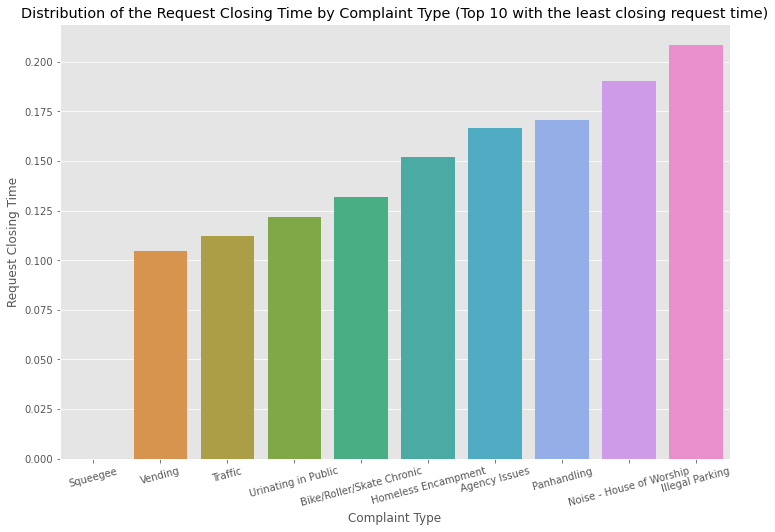

In [27]:
plt.figure(figsize=[12,8])
sns.barplot('Complaint Type', 'Request Closing Time', data=request_closing_time_by_complaint_type)
plt.xticks(rotation=15)
plt.title('Distribution of the Request Closing Time by Complaint Type (Top 10 with the least closing request time)');
plt.savefig('Request_closing_time_by_complaint_type.jpeg',papertype='a3')

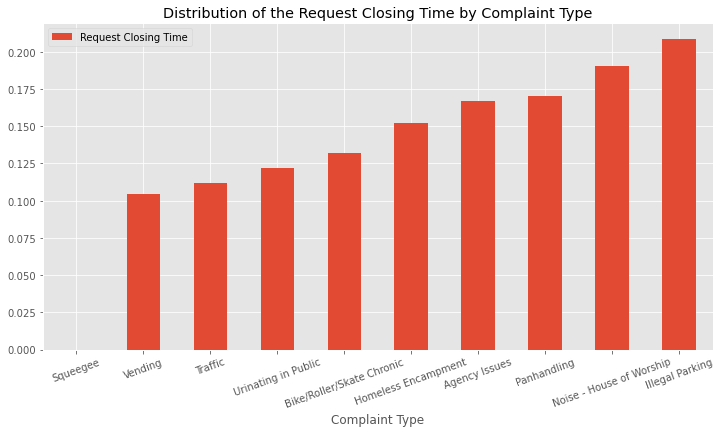

In [28]:
fig,ax=plt.subplots(figsize=[12,6])
request_closing_time_by_complaint_type.plot(kind='bar',x='Complaint Type',rot=20,ax=ax)
plt.title('Distribution of the Request Closing Time by Complaint Type');
plt.savefig('Request_closing_time_by_complaint_type.png',)

In [29]:
mean_request_closing_time_per_location_type = \
data.groupby(['Location Type','Complaint Type'])[['Request Closing Time']].mean().\
sort_values(by='Request Closing Time').reset_index()

In [30]:
mean_request_closing_time_per_location_type[:10].to_csv('mean_request_closing_time_per_location_type.csv')
request_closing_time_by_complaint_type.to_csv('request_closing_time_by_complaint_type.csv')

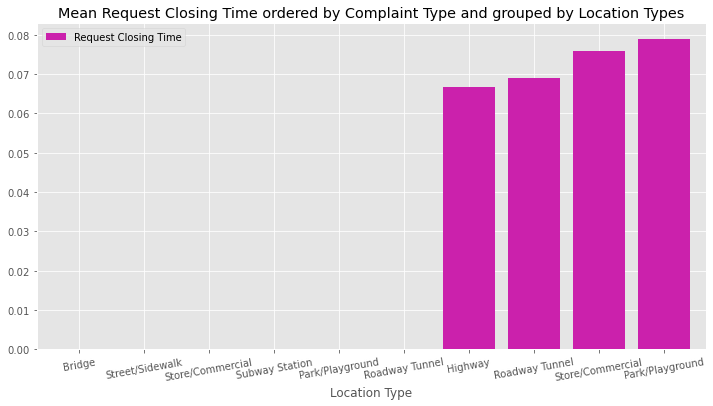

In [31]:
fig,ax= plt.subplots(figsize=[12,6])
mean_request_closing_time_per_location_type[:10].plot.bar(x='Location Type',rot=10,ax=ax,width=0.80,color='#cb21ac')
plt.title('Mean Request Closing Time ordered by Complaint Type and grouped by Location Types')
plt.savefig('top10_mean_request_closing_time_per_location_type.jpg');

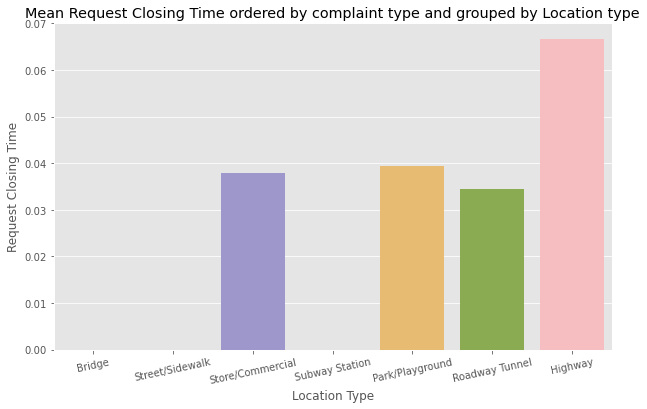

In [32]:
plt.figure(figsize=[10,6])
sns.barplot(x='Location Type', y= 'Request Closing Time',data=mean_request_closing_time_per_location_type[:10], ci=False)
plt.xticks(rotation=12)
plt.title('Mean Request Closing Time ordered by complaint type and grouped by Location type');

In [33]:
complaints_by_city = data[['City','Complaint Type']]

In [34]:
top_10_complaints_by_city= data.groupby(['City']).agg({'Complaint Type':'count'}\
                                              ).sort_values(by='Complaint Type',ascending =False).reset_index()[:10]

In [35]:
top_10_complaints_by_city.to_csv('top_10_complaints_by_city.csv')

In [36]:
top_10_complaints_by_city

,City,Complaint Type
0,BROOKLYN,98295
1,NEW YORK,65972
2,BRONX,40697
3,STATEN ISLAND,12338
4,JAMAICA,7294
5,ASTORIA,6330
6,FLUSHING,5970
7,RIDGEWOOD,5162
8,CORONA,4295
9,WOODSIDE,3544


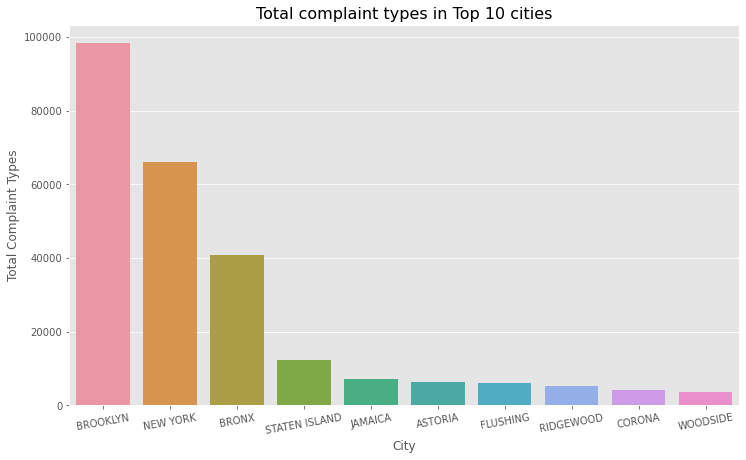

In [37]:
plt.figure(figsize=[12,7])
sns.barplot('City', 'Complaint Type', data=top_10_complaints_by_city)
plt.xticks(rotation=10)
plt.title('Total complaint types in Top 10 cities', fontsize=16)
plt.ylabel('Total Complaint Types');
plt.savefig('request_closing_request_time_by_city.jpeg',dpi=100)

In [38]:
most_complaint_type = pd.value_counts(data['Complaint Type'])

In [39]:
most_complaint_type.reset_index().to_csv('most_complaint_type.csv')

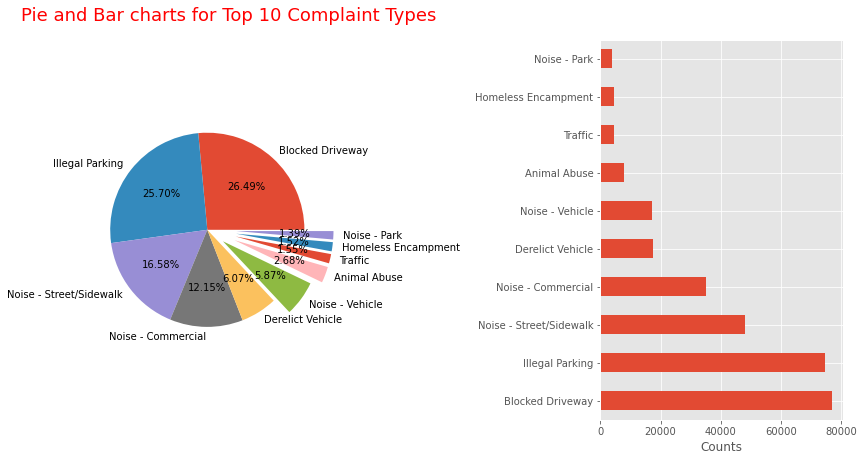

In [40]:
fig,ax = plt.subplots(1,2, figsize=[12,6.5])
fig.suptitle('Pie and Bar charts for Top 10 Complaint Types', fontsize=18, color='red', ha='right')

most_complaint_type[:10].plot(kind='pie',autopct='%.2f%%',ax=ax[0],explode=(0,0,0,0,0,0.2,0.3,0.3,0.3,0.3))
ax[0].set(ylabel='')

most_complaint_type[:10].plot.barh(x='Complaint Type',ax=ax[1])
ax[1].set_xlabel('Counts')
plt.tight_layout(1.2)
plt.savefig('Top_10_Complaint_Types.jpeg',dpi=140, papertype='a3');

In [41]:
data.Status.value_counts().to_frame()

,Status
Closed,298471
Open,36
Assigned,26
Draft,1


In [42]:
data['Request Closing Time'].value_counts().to_frame().sort_index()

,Request Closing Time
0,230530
1,66168
2,1448
3,243
4,71
5,27
6,25
7,13
8,3
9,2


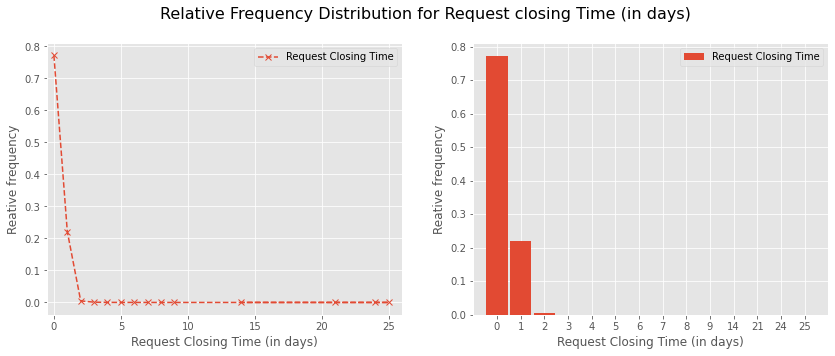

In [43]:
fig,ax= plt.subplots(1,2,figsize=[14,5])
data['Request Closing Time'].value_counts().to_frame().transform(lambda x:x/x.sum()).plot(marker='x',ax=ax[0],linestyle='--')
ax[0].set(xlim=(-0.5,26),xlabel= 'Request Closing Time (in days)',ylabel= 'Reative frequency')

data['Request Closing Time'].value_counts().to_frame().sort_index().transform(lambda x:x/x.sum()).plot(kind='bar',ax=ax[1],rot=0,width=0.9)
ax[1].set(xlabel= 'Request Closing Time (in days)',ylabel= 'Reative frequency',xlim=(-1,14))
fig.suptitle('Relative Frequency Distribution for Request closing Time (in days)',fontsize=16);

In [44]:
from scipy.stats import f_oneway

In [45]:
unique_complaint_type = data['Complaint Type'].unique().tolist()

In [46]:
print(unique_complaint_type, end='')

['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Agency Issues', 'Squeegee', 'Animal in a Park']

In [47]:
from collections import defaultdict

In [48]:
complaint_type_dict = defaultdict(list)

In [49]:
for complaint, closing_time in data[['Complaint Type','Request Closing Time']].values:
    if complaint in unique_complaint_type:
        complaint_type_dict[complaint].append(closing_time)

In [50]:
len(complaint_type_dict)

23

In [51]:
complaint_type_array = np.array([array for key,array in complaint_type_dict.items()]) 

In [52]:
noise_street_sidewlak = complaint_type_array[0]
blocked_driveway = complaint_type_array[1]
illegal_parking = complaint_type_array[2]
derelict_vehicle =complaint_type_array[3]
noise_commercial = complaint_type_array[4]
posting_advert = complaint_type_array[5]
noise_vehicle = complaint_type_array[6]
animal_abuse = complaint_type_array[7]
vending = complaint_type_array[8]
traffic = complaint_type_array[9]
drinking = complaint_type_array[10]
bike_roller_skate = complaint_type_array[11]
panhandling = complaint_type_array[12]
noise_park = complaint_type_array[13]
homeless_encamp = complaint_type_array[14]
urinate_pub = complaint_type_array[15]
graffiti = complaint_type_array[16]
disorder_youth = complaint_type_array[17]
illegal_fireworks = complaint_type_array[18]
agency_issues = complaint_type_array[19]
squeegee = complaint_type_array[20]
animal_park = complaint_type_array[21]

In [53]:
F_statistic,p_val = \
f_oneway(noise_street_sidewlak,blocked_driveway,illegal_parking,derelict_vehicle,noise_commercial,\
         posting_advert,noise_vehicle,animal_abuse,vending,traffic,drinking,bike_roller_skate,panhandling,\
         noise_park,homeless_encamp,urinate_pub,graffiti,disorder_youth,illegal_fireworks,agency_issues,\
         squeegee,animal_park)

In [54]:
print('F-Statistic: {}, p-value:{}'.format(F_statistic,p_val))

F-Statistic: 113.60854996102988, p-value:0.0


In [55]:
from scipy.stats import chi2_contingency

In [56]:
contingency_table = pd.crosstab(data['Location Type'], data['Complaint Type'])

In [57]:
chisq_statistic, p_value, ddof, expected = chi2_contingency(contingency_table.values)

In [58]:
print('Chi square statistic: {}, p-value: {}'.format(chisq_statistic,p_value))

Chi square statistic: 1328207.9670820665, p-value: 0.0
